In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
gpm_folder = cnst.network_data + 'data/OBS/IMERG_HQ_precip/'

In [4]:
mcs_folder = cnst.network_data + 'MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/'

In [5]:
flist = glob.glob(gpm_folder+'*/*/*.nc4')

In [6]:
flist

['/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050129-0430.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050105-0130.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050122-0930.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050112-2200.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050110-1700.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050122-0000.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050121-2300.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050120-0730.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050112-1800.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.

In [8]:
# make salem grid
dummyp = gpm_folder+str(2007)+'/'+str(11).zfill(2)+'/*.nc4'
dummyf = glob.glob(dummyp)

bla = xr.open_dataset(dummyf[0])
bla = bla['HQprecipitation'].squeeze()
bla = bla.T
grid = u_grid.make(bla['lon'].values, bla['lat'].values, 5000)

grid_lons, grid_lats = np.meshgrid(bla['lon'].values, bla['lat'].values)
inds, weights, shape = u_int.interpolation_weights_grid(grid_lons,grid_lats , grid)

lon, lat = grid.ll_coordinates

tdic = {}
mdic = {}
for y in [2004]:#,2006,2007]:
    for m in range(3,12): 
        tdic[m] = 0
        mdic[m] = 0
        tpath = gpm_folder+str(y)+'/'+str(m).zfill(2)+'/*.nc4'
        tlist = glob.glob(tpath)
        
        mpath = mcs_folder + str(y)+'-'+str(m).zfill(2)+'*.nc'
        mlist = glob.glob(mpath)
        
        for tfile in tlist:
            da = xr.open_dataset(tfile)
            
            _h = da['time.hour'].values[0]

            if (_h <15) | (_h>21):
                print('Wrong hour')
                continue
            print(_h)
            print('Doingt ',tfile)
            da = da['HQprecipitation'].squeeze()
            da = da.T
            outt = u_int.interpolate_data(da.values, inds, weights, shape)
            dda = xr.DataArray(outt, coords={'lat': lat[:,0], 'lon':lon[0,:]}, dims=['lat', 'lon'])
            pbox = dda.sel(lat=slice(4.5,9), lon=slice(-12,12))
            ptot = pbox.where(pbox>0.1).sum().values
            tdic[m] += ptot
            
        for mfile in mlist:
            print('Doing ', mfile)
            da = xr.open_dataset(mfile)
            tmask = np.isfinite(da['tc_lag0'].values) & (da['p'].values > 0.1)
            ptot = np.sum((da['p'].values)[tmask])
            mdic[m] += ptot

21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040312-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040326-1500.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040327-1800.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040323-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040315-2030.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040303-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20

20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040313-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040330-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040323-2100.nc4
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040307-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040312-2030.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040322-1500.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040316-2000.nc4
Wrong hour
Wrong hour
15
Doingt  /home/

Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040318-1500.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040315-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040330-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040304-1930.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040312-1830.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040310-1630.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040319-1800.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004

19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040324-1900.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040305-1530.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040327-1700.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040308-1600.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040329-2000.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040322-2130.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040309-2000.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040323-1530.

Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040306-1600.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040326-1800.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040327-1730.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040328-2000.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040326-1900.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040319-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040329-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/corn

Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040311-1730.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040301-2130.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040320-1530.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040328-1900.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040328-1830.nc4
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040319-1600.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040330-1800.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040313-1500.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS

Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040320-1600.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040315-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040331-1930.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040312-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040321-2100.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040313-1600.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040316-2100.nc4
Wrong hour
21
Doingt  /home/ck/DIR/corn

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040307-1630.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040328-1730.nc4
Wrong hour
Wrong hour
Wrong hour
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-20_18:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-27_21:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-15_19:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-15_19:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-21_15:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-14_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-28_19:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-01_21:00:00_40.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-20_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-18_20:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-29_19:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-24_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-29_19:00:00_35.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-01_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-28_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-22_21:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-25_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-18_16:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-31_18:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-01_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-31_20:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-27_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-27_15:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-23_18:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-21_19:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-17_20:00:00_2.nc

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-12_19:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-13_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-19_15:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-02_15:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-01_19:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-27_18:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-02_21:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-15_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-29_21:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-02_15:00:00_4

21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040411-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040405-1600.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040420-1730.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040416-1700.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040429-1930.nc4
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040408-1600.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040414-1930.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong 

Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040405-1730.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040430-1900.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040423-1730.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040401-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040404-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040410-1800.nc4
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040430-2100.nc4
19
Doingt  /home/

Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040411-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040414-1500.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040416-1500.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040415-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040403-1500.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040401-1730.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cor

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040408-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040416-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040404-1800.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040425-1800.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040402-1800.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040404-1600.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20

Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040409-2100.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040426-1500.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040417-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040424-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040405-1530.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040423-1800.nc4
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/200

Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040406-1700.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040424-1800.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040421-1730.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040409-1600.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040420-2130.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040415-1830.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040427-2000.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040422-2130.nc4
18
Doingt  /home/ck/DIR/cornk

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-30_18:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-05_19:00:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-05_19:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-19_19:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-23_18:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-06_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-22_19:00:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-04_18:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-29_18:00:00_65.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-29_21:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-07_17:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-19_18:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-15_20:00:00_32.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-12_19:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-18_19:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-19_19:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-06_19:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-26_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-20_19:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-30_18:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-29_20:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-02_21:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-07_20:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-30_21:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-18_18:00:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-01_18:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-25_19:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-29_20:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-04_18:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-28_21:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-18_19:00:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-19_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-17_21:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-04_18:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-21_18:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-14_15:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-18_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-02_17:00:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-01_20:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-19_19:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-20_19:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-03_21:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-17_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-19_17:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-27_19:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-12_18:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-06_21:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-20_20:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-26_18:00:00_84.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-02_19:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040530-1900.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040502-2030.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040517-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040515-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040510-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040526-1630.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cor

15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040516-1500.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040518-1900.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040528-1730.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040528-1700.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040524-1900.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040504-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040508-1700.nc4
15
Doi

Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040503-1730.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040525-1600.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040511-2100.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040528-2000.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040511-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040511-2000.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040526-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/

15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040506-1530.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040514-2030.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040503-2100.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040513-1600.nc4
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040520-1630.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040527-1600.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040524-1500.nc4
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040518-2100.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040505-1800.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040510-1900.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040518-1800.nc4
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040524-1600.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040508-1900.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040526-2000.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040527-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/corn

Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040509-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040525-1500.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040529-1530.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040504-1630.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040519-1700.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040502-2130.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20

19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040529-1900.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040503-1800.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040518-2130.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040510-1930.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040504-1530.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040523-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040512-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong 

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-20_21:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-13_19:00:00_42.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-04_19:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-21_20:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-27_17:00:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-29_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-17_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-04_18:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-10_19:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-22_19:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-08_15:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-21_18:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-09_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-17_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-10_19:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-31_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-04_17:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-26_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-05_16:00:00_1.n

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-10_18:00:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-29_18:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-30_18:00:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_17:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-01_18:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-04_18:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-26_16:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-20_17:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-10_19:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-27_21:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040614-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040610-1930.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040603-2130.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040623-1900.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040624-1700.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040626-2130.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040603-1900.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OB

21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040610-2130.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040614-1830.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040629-1830.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040602-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040619-2000.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040629-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040630-1530.nc4
18
Doi

20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040605-2030.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040624-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040607-2100.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040606-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040612-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040615-1800.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20

Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040622-2030.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040623-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040625-2130.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040630-1500.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040612-1700.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040618-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040604-1900

Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040623-1700.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040629-2130.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040604-1730.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040617-1530.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040604-1530.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040605-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040625-1630.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/

20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040629-2030.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040615-1700.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040601-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040610-1600.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040616-1530.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040610-2100.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040622-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IME

18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040614-1800.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040602-1930.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040606-1530.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040614-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040621-1930.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040614-2030.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040606-1800.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.200

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-20_18:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-20_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-06_20:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_18:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-25_17:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-07_21:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_17:30:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-27_19:30:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-10_17:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-11_21:00:00_3

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-09_18:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-10_18:30:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-08_17:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-08_19:00:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-19_18:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-07_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-14_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-16_17:30:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_19:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-07_18:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-11_18:00:00_46.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-14_21:30:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-11_20:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-09_17:00:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_19:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-27_21:30:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_20:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-19_18:30:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-29_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-02_18:30:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-19_17:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_18:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-08_19:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_20:00:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_21:30:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-06_20:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-29_17:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-21_16:30:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-03_20:30:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-09_21:30:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-10_19:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_17:30:00_32.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-03_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_18:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-28_21:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-16_17:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-10_21:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-02_18:30:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-15_18:00:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_18:30:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_21:30:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-19_21:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-05_18:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-09_17:30:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-29_17:30:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-12_17:30:00_31.nc
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040719-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040705-2000.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040711-21

Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040729-1930.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040723-1600.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040703-1900.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040707-1630.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040702-1700.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040716-2000.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040705-1700.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OB

Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040725-1730.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040726-1930.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040720-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040716-1500.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040729-1730.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040708-2030.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040709-1700.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_

17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040724-1730.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040720-1630.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040730-1700.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040710-2130.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040724-2030.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040727-2000.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040719-1930.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040715-1730.nc4
Wrong hour
15
Doin

20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040715-2030.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040716-1700.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040720-1530.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040705-1600.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040728-2000.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040704-1800.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040704-1500.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_

Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040731-2000.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040717-1730.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040705-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040713-1600.nc4
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040709-1630.nc4
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040707-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/O

Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040718-1730.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040711-1930.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040702-1800.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040710-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040712-1700.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040715-2000.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040712-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong 

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040706-1630.nc4
Wrong hour
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-24_17:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-13_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-30_18:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-04_18:30:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-15_21:30:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-05_19:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-12_21:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-08_20:00:00_26.nc
Doing  /home/ck/DIR/

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-28_18:00:00_42.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-27_19:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-12_17:30:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-10_18:00:00_42.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-07_21:30:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-28_18:00:00_71.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-16_21:30:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-04_19:30:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-30_19:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-08_21:00:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-24_17:30:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-03_18:30:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-20_20:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-10_18:00:00_49.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-06_20:30:00_47.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-12_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-31_18:30:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-28_18:00:00_65.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-21_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-21_18:30:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-06_20:30:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-24_21:30:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-13_20:30:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-31_19:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-14_18:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-31_18:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-17_19:30:00_56.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-29_18:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-06_21:30:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-26_19:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-13_19:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-09_18:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-21_17:00:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-17_17:00:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-01_20:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-09_17:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-28_20:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-24_17:30:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-20_18:00:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-18_18:30:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-16_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-16_18:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-30_18:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-02_20:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-04_19:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-17_18:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-29_21:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-30_17:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-18_19:30:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-03_19:30:00_4

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-05_20:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-30_18:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-01_18:30:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-08_20:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-29_17:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-10_19:30:00_79.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-26_17:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-04_17:30:00_35.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-22_17:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-06_19:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-07_21:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-13_18:30:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-06_19:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-30_19:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-04_17:00:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-01_18:30:00_49.nc
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040802-1800.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040806-1700.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040805-21

19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040804-1900.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040817-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040805-1830.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040812-1700.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040809-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040827-1730.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ

16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040801-1600.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040827-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040817-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040806-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040827-1530.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/20

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040803-1730.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040827-1500.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040809-1500.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040818-2030.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040826-1800.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040822-1700.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040825-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040818-2000.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040816-1700.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040810-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040829-1630.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040810-1800.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040824-2000.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040808-1700.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IME

Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040806-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040808-1530.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040807-1500.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040801-1530.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040805-1930.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040805-2030.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040805-2000.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OB

Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040816-2130.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040814-2100.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040824-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040814-1630.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040823-1930.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040823-1830.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040825-2030.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040813-1930.nc4
21
Doingt  /home/c

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-28_15:30:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-27_16:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-27_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-14_18:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-27_17:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-28_17:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-25_18:30:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-14_17:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_21:30:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-28_21:30:00_16.n

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-03_17:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-29_19:30:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_17:30:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-04_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-13_21:00:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_18:30:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-09_20:30:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-23_18:30:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-17_21:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-07_21:00:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_18:30:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-07_19:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-29_20:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-01_19:30:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-22_20:30:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-23_17:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-29_18:30:00_44.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-31_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_18:30:00_39.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-12_18:30:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-24_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-01_21:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-25_16:30:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-29_18:30:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-11_21:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-10_17:30:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-30_18:30:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-30_20:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-08_16:00:00_21.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-28_17:30:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-22_17:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-04_20:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-30_18:00:00_55.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-13_21:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-17_20:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-31_19:00:00_43.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-29_19:30:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-28_17:30:00_3.nc
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040929-1500.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_p

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040919-1700.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040909-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040929-1900.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040914-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040919-1730.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040902-193

17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040914-1730.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040919-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040901-1800.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040901-2130.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040915-1830.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040912-1730.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040913-1730.nc4
Wrong hour
Wrong 

Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040918-1530.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040929-1730.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040911-1930.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040905-1500.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040915-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040908-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040905-1630.nc4
Wrong 

Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040912-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040923-1500.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040901-1830.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040907-1830.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040923-1700.nc4
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040903-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IM

Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040907-1930.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040908-1600.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040905-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040908-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040911-1800.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040903-1530.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040927-2130.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OB

Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040923-1630.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040927-1830.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040912-1700.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040904-1800.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040926-1530.nc4
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040909-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040916-1700.nc4
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.

20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040908-2000.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040916-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040906-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040915-2030.nc4
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040918-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040912-1830.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/O

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

 /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-18_19:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_20:00:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_17:30:00_50.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-15_21:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-24_18:30:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_18:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_18:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-23_18:30:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_17:30:00_46.n

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-22_18:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-04_18:00:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-04_18:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-30_18:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_17:30:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_18:30:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_18:30:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-04_19:30:00_46.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-07_19:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-24_15:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_17:30:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-23_17:30:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_17:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_18:30:00_40.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_19:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_19:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_21:30:00_35.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-24_18:30:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_19:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_20:00:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_19:00:00_56.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_18:00:00_37.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-04_20:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-19_20:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_20:30:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_17:30:00_51.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_21:30:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-27_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-15_18:30:00_65.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_17:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-12_18:00:00_57.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-29_18:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_19:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-26_19:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-26_19:30:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_19:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-26_19:00:00_54.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-15_21:30:00_45.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_17:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-25_19:00:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_18:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_18:30:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-18_18:00:00_51.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-28_21:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-18_17:30:00_64.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-09_18:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-12_19:30:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-19_20:00:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-25_17:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_21:30:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-28_18:30:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_20:30:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_19:00:00_48.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_19:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_21:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-19_18:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-16_21:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_17:30:00_81.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-05_19:00:00_45.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-19_18:30:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_20:00:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_17:30:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_18:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_17:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-29_18:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_19:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_18:30:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-25_17:30:00_44.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-29_18:30:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_21:30:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-22_17:30:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-18_17:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-12_19:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_17:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_18:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-22_17:30:00_46.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_18:30:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_17:00:00_63.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_21:30:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_19:30:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-19_17:00:00_32.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_18:30:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_19:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-30_17:30:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-03_21:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-24_20:30:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-27_21:30:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_17:30:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_19:00:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-04_17:30:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_20:30:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-20_18:00:00_58.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-23_17:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_21:30:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-11_17:30:00_32.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-12_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_18:00:00_58.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_21:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-09_17:30

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041024-1700.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041005-1530.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041004-1900.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041013-1530.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041017-1530.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041025-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041026-2130.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041016-1730.

19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041005-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041019-1700.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041018-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041030-1730.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041021-1830.nc4
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041014-2000.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041026-1930.nc4
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/corn

16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041031-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041016-1900.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041024-1900.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041007-1930.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041012-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041011-2100.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/200

17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041023-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041029-2100.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041017-1730.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041017-1800.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041001-1500.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041006-2030.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041011-1830.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041021-1530.

18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041010-1830.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041002-1730.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041030-1900.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041011-1900.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041004-1500.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041010-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041015-1600.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OB

Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041020-2130.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041007-2000.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041027-1600.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041002-2030.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041008-2030.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041031-1830.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041020-2000

Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041007-2030.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041011-1930.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041001-1530.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041012-1500.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041029-2130.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041001-1930.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041020-1530.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/10/3B-HHR.

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-29_20:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-23_18:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-22_20:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-20_18:00:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-22_17:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-21_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-16_16:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_19:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-09_20:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-16_18:00:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-02_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-30_18:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-08_18:00:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-28_20:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_19:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-24_18:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-07_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_18:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-01_17:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_16:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-13_18:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-25_19:00:00_62.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-01_17:00:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-07_18:00:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-09_19:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_19:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_18:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-25_19:00:00_58.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-13_19:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_21:00:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-15_20:00:00_39.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-16_18:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-19_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-08_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_18:00:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-09_20:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-24_18:00:00_50.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-26_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-15_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-25_21:00:00_2

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-15_18:00:00_50.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_19:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-19_17:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-16_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-16_18:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-03_20:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-17_15:00:00_68.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_18:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-03_17:00:00_43.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-29_18:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041115-1530.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041101-1630.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041107-1830.nc4
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041104-2100.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041111-1500.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041126-2030.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041121-1700.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.

Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041129-2000.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041124-2030.nc4
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041120-1600.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041123-1530.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041125-1700.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041119-1830.nc4
Wrong hour
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041118-1530

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041107-2030.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041129-1730.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041121-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041109-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041124-1730.nc4
Wrong hour
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041124-1530.nc4
Wrong hour
Wrong hour
20
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ

Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041125-2100.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041129-1500.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041112-1530.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041118-2130.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041127-1730.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041114-1800.nc4
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041116-2100.nc4
Wrong hour
Wrong hour
Wrong hour
20
Doi

Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041110-2130.nc4
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041102-1700.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041112-1700.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041126-1930.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041103-1730.nc4
Wrong hour
Wrong hour
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041107-1730.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041124-1800.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004

21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041121-2100.nc4
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041130-1900.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041101-1600.nc4
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041103-1500.nc4
Wrong hour
Wrong hour
Wrong hour
21
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041106-2100.nc4
Wrong hour
15
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041129-1530.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041130-1830.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041117-1830.nc4
Wrong hour
15
Doingt  /home/c

Wrong hour
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041109-1630.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041118-1800.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041104-1900.nc4
Wrong hour
16
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041128-1630.nc4
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041130-1930.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041110-1930.nc4
Wrong hour
17
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041125-1730.nc4
Wrong hour
Wrong hour
Wrong hour
19
Doingt  /home/ck/DIR/cornkle/data/OB

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-05_19:00:00_53.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-02_20:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-05_18:00:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-08_17:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-12_21:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-23_19:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-18_20:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-03_21:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-02_15:00:00_35.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-25_19:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-27_18:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-21_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-26_18:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-10_16:00:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-02_18:00:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-08_19:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-06_18:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-05_20:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-26_18:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-11_15:00:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-15_19:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-18_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-15_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-10_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-09_19:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-04_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-01_19:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-06_18:00:00_43.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-25_20:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-25_19:00:00_2

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encount

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-03_19:00:00_45.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-25_19:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-18_20:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-09_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-21_21:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-20_21:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-07_21:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-22_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-26_18:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-06_18:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


In [9]:
mdic

{3: 227654.04225012165,
 4: 393391.6367370398,
 5: 520268.4278656938,
 6: 683615.9904567759,
 7: 390697.2734089338,
 8: 265575.12094472,
 9: 829322.1322888719,
 10: 377633.28434786334,
 11: 233956.84930622397}

In [11]:
tdic

{3: 774943.0689130686,
 4: 1576811.4281917033,
 5: 1637800.8806101086,
 6: 1424681.7693035537,
 7: 1274711.4000680824,
 8: 1139850.83920063,
 9: 1931092.8818965189,
 10: 1590159.5712238788,
 11: 898099.0866774275}

In [14]:
for m in mdic.keys():
    print(m, mdic[m]/tdic[m]*100)

3 29.376873138491078
4 24.948553118249762
5 31.766280872427238
6 47.98376768665728
7 30.649861089189805
8 23.299111761935983
9 42.94574021081771
10 23.74813768263615
11 26.050226837637886


In [57]:
tpath = gpm_folder+'2007'+'/'+'11'+'/*18-18*'
tlist = glob.glob(tpath)

In [58]:
tlist

['/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2007/11/3B-HHR.MS.MRG.3IMERG.V06A.20071118-1800.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2007/11/3B-HHR.MS.MRG.3IMERG.V06A.20071118-1830.nc4']

In [75]:
da = xr.open_dataset(tlist[0])
da = da['HQprecipitation'].squeeze()
da = da.T
pbox = da.sel(lat=slice(4.5,9), lon=slice(-12,12))

In [76]:
pbox

<xarray.DataArray 'HQprecipitation' (lat: 45, lon: 240)>
array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.55 4.65 4.75 4.85 4.95 ... 8.55 8.65 8.75 8.85 8.95
  * lon      (lon) float32 -11.95 -11.85 -11.75 -11.65 ... 11.75 11.85 11.95
    time     datetime64[ns] 2007-11-18T18:00:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    origname:          HQprecipitation
    fullnamepath:      /Grid/HQprecipitation

In [77]:
def draw_map(da):
    f=plt.figure(figsize=(15,10))
    lat = da['lat']
    lon = da['lon']
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon, lat, da, transform=ccrs.PlateCarree())
    plt.colorbar()
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.show()

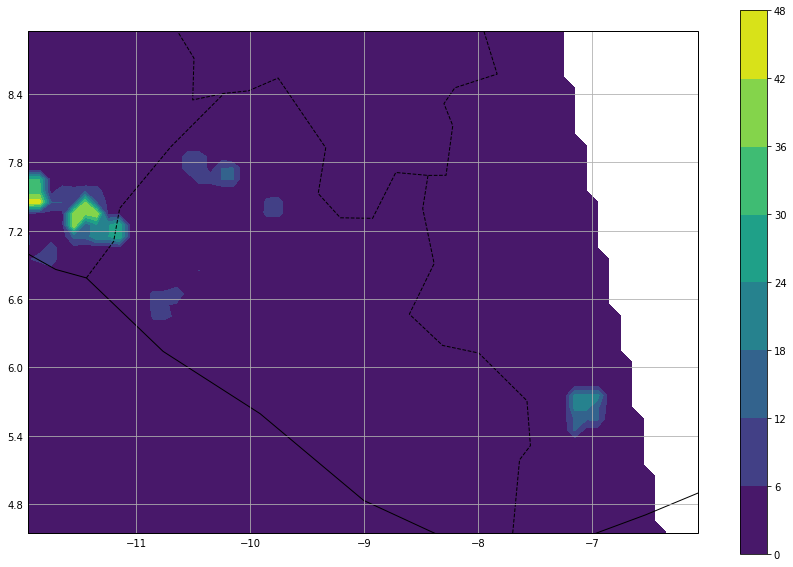

In [78]:
draw_map(pbox)

In [80]:
np.mean(pbox)

<xarray.DataArray 'HQprecipitation' ()>
array(0.745934, dtype=float32)
Coordinates:
    time     datetime64[ns] 2007-11-18T18:00:00

In [81]:
mfiles = glob.glob(mcs_folder + str(2007)+'-'+str(11).zfill(2)+'-18'+'*.nc')

In [82]:
mfiles

['/home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2007-11-18_20:00:00_9.nc',
 '/home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2007-11-18_18:00:00_12.nc',
 '/home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2007-11-18_18:00:00_36.nc']

0.0
0.3962201678724853
0.1692552246186309


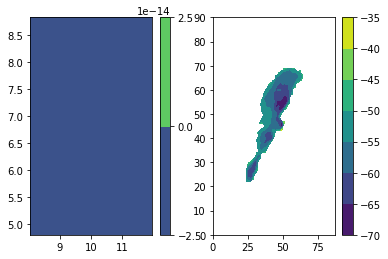

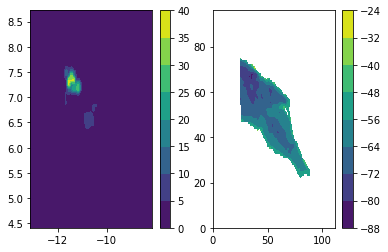

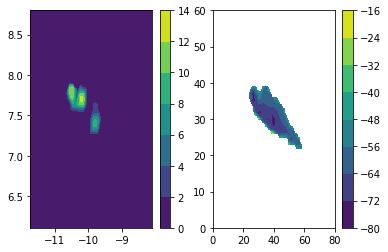

In [83]:
tot = 0
for m in mfiles:
    da = xr.open_dataset(m)
    tmask = np.isnan(da['tc_lag0'].values) | np.isnan(da['p'].values)
    
    (da['p'].values)[tmask] = 0

    f = plt.figure()
    ax = f.add_subplot(121)
    plt.contourf(da['lon'],da['lat'], da['p'])
    plt.colorbar()
    ax = f.add_subplot(122)
    plt.contourf(da['tc_lag0'])
    plt.colorbar()
    ptot = np.nanmean(da['p'])
    print(ptot)
    tot += ptot

In [84]:
tot

0.5654753924911162